In [58]:
import numpy as np
from PIL import Image
from sklearn.externals import joblib
import time
import random
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
# 需要去重的图片文件夹
rumor_pics_dir = '../../pics_filtered_img_rumor'
# 文件夹中的所有图片名
rumor_pics_name_file = 'file/rumor_pics_name.txt'

with open(rumor_pics_name_file, 'r') as src:
    lines = src.readlines()
image_paths = [os.path.join(rumor_pics_dir, line.strip('\n').split('/')[-1]) for line in lines]
sz = len(image_paths)
print('正在对{}中的图片去重，其中共有{}张图片'.format(rumor_pics_dir.split('/')[-1], sz))

正在对pics_filtered_img_rumor中的图片去重，其中共有17494张图片


In [49]:
image_paths[0]

'../../pics_filtered_img_rumor/6dd2c173jw1e2yrisad92j.jpg'

In [50]:
matrix = joblib.load('pkl/matrix_17494.pkl')

In [51]:
matrix.shape

(17494, 17494)

In [52]:
test = matrix.copy()

In [53]:
similarity_pics = []
for i in range(sz):
    array = test[i]
    if array[array > 0.75].shape[0] > 50:
        similarity_pics.append(image_paths[i])
        continue

len(similarity_pics)

32

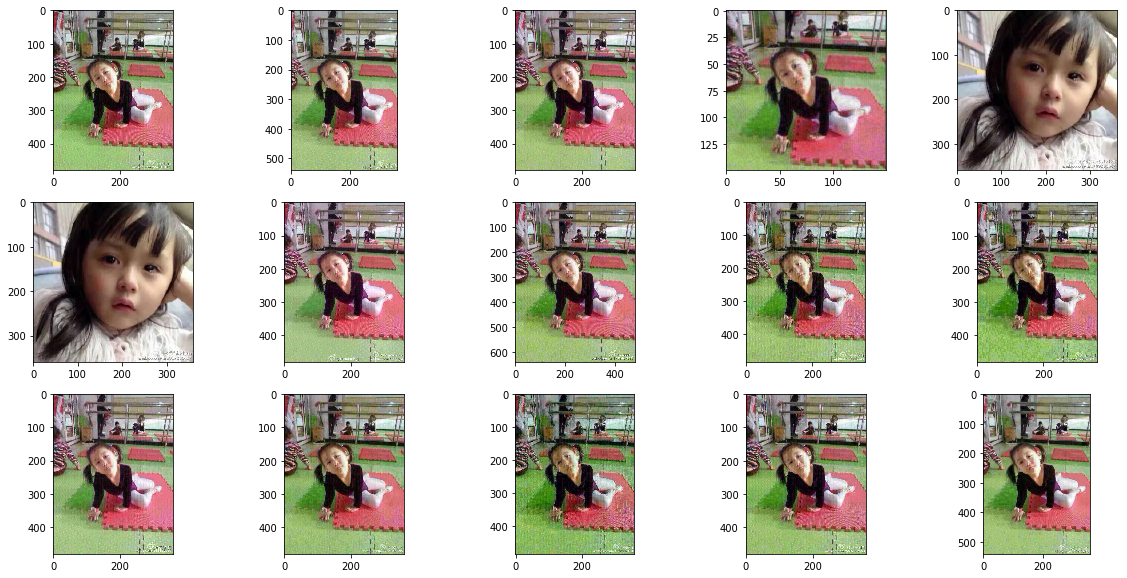

In [54]:
random_pics = random.sample(similarity_pics, 15)

plt.figure(figsize=(20,10))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(plt.imread(random_pics[i]))

## Clustering

In [328]:
from clustering_by_matrix import *
spc = joblib.load('pkl/phash_spc_17494_ts0.7.pkl')

print('Raw sz = {}, Afetr clustering, sz = {}'.format(sz, len(spc.cluster_list)))

Raw sz = 17494, Afetr clustering, sz = 2664


In [329]:
clusters = spc.cluster_list
n_list = [c.node_list for c in clusters]

In [330]:
n_len_list = [len(n) for n in n_list]

In [331]:
n_len_list.sort(reverse=True)
n_len_list

[53,
 42,
 36,
 36,
 35,
 35,
 35,
 35,
 34,
 33,
 33,
 32,
 32,
 32,
 31,
 30,
 30,
 30,
 30,
 29,
 29,
 28,
 28,
 28,
 27,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,


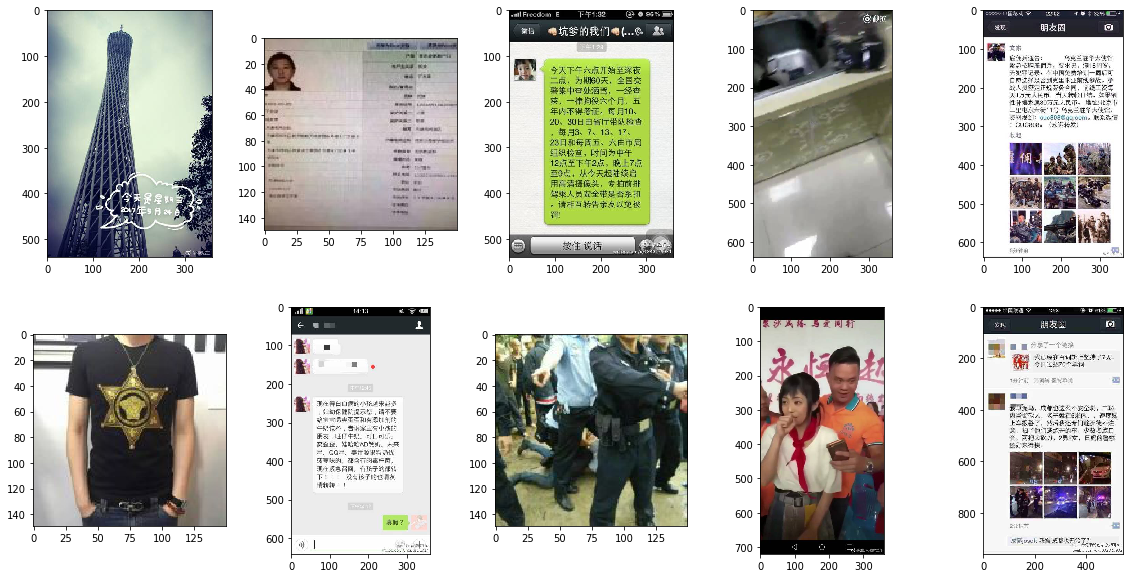

In [335]:
for i in range(random.randint(0, len(n_list)-1), len(n_list)):
# for i in range(len(n_list)):
    if len(n_list[i]) > 10:
        plt.figure(figsize=(20,10))
        
        x = n_list[i][:10]
#         for j in range(random.randint(0, len(x)-1), len(x)):
        for j in range(len(x)):
            plt.subplot(2, 5, j + 1)
            plt.imshow(plt.imread(image_paths[n_list[i][j]]))
        
        break

### Test ImageHash

In [337]:
# 52-6dd2c173jw1e2yrisad92j
# 51-6dd2c173jw1e2yrisad92j

a = '6dd2c173jw1e2yrisad92j.jpg'
b = '6dd2c173jw1e2yrisad92j.jpg'

In [341]:
for index, path in enumerate(image_paths):
    if a in path:
        i = index
    if b in path:
        j = index

In [342]:
i, j

(0, 0)

In [343]:
image_paths[0]

'../../pics_filtered_img_rumor/6dd2c173jw1e2yrisad92j.jpg'

In [345]:
threshold = 0.8

clustering_pics_dir = '../../clustering_rumor_ts{}'.format(threshold)
spc = joblib.load('pkl/phash_spc_17494_ts{}.pkl'.format(threshold))

In [347]:
clusters = spc.cluster_list
n_list = [c.node_list for c in clusters]
print('clusters_size = {}, img_sz = {}, del_sz = {}'.format(
        len(clusters), sz, sz - len(clusters)))
        
# 执行cp命令
valid_num = 0
start_time = time.time()
for i, c in enumerate(chosen_index):
    # 随机留一张在原文件夹中，其余的mv
    # nodes = random.sample(n_list[c], n_len_list[c] - 1)
    
    nodes = n_list[c]
    for node in nodes:
        img = image_paths[node]

clusters_size = 11450, img_sz = 17494, del_sz = 6044
[0, 1, 0, 0, 4, 5, 0, 0, 0, 0, 0, 1, 0, 5, 14, 0, 0, 0, 18, 0, 0, 21, 0, 23, 21, 0, 26, 21, 0, 0, 0, 0, 21, 0, 34, 0, 21, 0, 38, 0, 21, 0, 21, 38, 21, 0, 0, 0, 0, 0, 50, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 23, 0, 0, 0, 0, 0, 5, 21, 23, 50, 71, 0, 0, 0, 75, 0, 21, 0, 0, 80, 0, 0, 38, 4, 21, 0, 38, 21, 0, 0, 0, 92, 0, 21, 38, 21, 21, 0, 0, 0, 4, 21, 4, 0, 34, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 21, 21, 0, 122, 5, 0, 0, 0, 1, 21, 0, 0, 0, 0, 21, 0, 26, 18, 4, 0, 21, 0, 38, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 21, 0, 0, 0, 38, 38, 0, 0, 21, 0, 34, 21, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 18, 18, 5, 23, 0, 0, 21, 186, 0, 21, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 201, 50, 0, 0, 0, 5, 0, 4, 21, 0, 23, 23, 0, 214, 215, 0, 71, 0, 21, 0, 0, 0, 0, 0, 0, 4, 0, 228, 5, 0, 0, 0, 0, 26, 4, 38, 0, 1, 0, 0, 0, 21, 0, 0, 4, 0, 0, 0, 0, 14, 0, 21, 0, 0, 0, 0, 0, 0, 0, 21, 0, 21, 21, 0, 80, 0, 21, 4, 21, 21, 0, 38, 21, 21, 0, 0, 0, 18, 0, 71, 23, 0, 0, 